In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
paris_df = pd.read_excel("accessibilite-des-gares-et-stations-metro-et-rer-ratp.xls")

In [3]:
paris_df.head()

,IDPTAR,Code INSEE,Departement,X,Y,Accessibilité UFR,Annonce Sonore Prochain Passage,Annonce Visuelle Prochain Passage,Annonce Sonore Situations Perturbées,Annonce Visuelle Situations Perturbées,Code Stif,coord,ID AMIVIF,Nom Station/gare,PAQT,Téléphone,Date de mise en accessibilité,Accessibilité Quai / Train
0,1751,75120,75,605457,2427632,0,1,1,1,1,1001100010001,"48.8470164776, 2.410816879",IDAMIVIF,Porte de Vincennes,0,NaN,NaN,0
1,1856,92051,92,595260,2431446,0,1,1,1,1,1001100010001,"48.8812991447, 2.27191517268",IDAMIVIF,Les Sablons (Jardin d'acclimatation),0,NaN,NaN,0
2,1887,92062,92,592772,2432620,0,1,1,1,1,1001100010001,"48.8918267141, 2.23799203988",IDAMIVIF,La Defense (Grande Arche),0,NaN,NaN,0
3,1955,75112,75,602713,2427468,0,1,1,1,1,1001100010001,"48.8455597463, 2.37344920163",IDAMIVIF,Gare de Lyon,0,NaN,NaN,0
4,2036,75101,75,600839,2428915,0,1,1,1,1,1001100010001,"48.8585696317, 2.3479332425",IDAMIVIF,Chatelet,0,NaN,NaN,0


Knowing that the data are encoded as "1" if the station is accessible and "0" if it is not, we can group the stations based on that:

In [4]:
paris_df.groupby("Accessibilité UFR").count()

,IDPTAR,Code INSEE,Departement,X,Y,Annonce Sonore Prochain Passage,Annonce Visuelle Prochain Passage,Annonce Sonore Situations Perturbées,Annonce Visuelle Situations Perturbées,Code Stif,coord,ID AMIVIF,Nom Station/gare,PAQT,Téléphone,Date de mise en accessibilité,Accessibilité Quai / Train
Accessibilité UFR,,,,,,,,,,,,,,,,,
0,745,745,745,745,745,745,745,745,745,745,745,745,745,745,0,0,745
1,156,156,156,156,156,156,156,156,156,156,156,156,156,156,0,0,156


In [5]:
len(paris_df)

901

In [6]:
round((156/len(paris_df))*100)

17

So only 156 stations out of 901 (17%) are accessible for people on a wheelchair, but also for people with visual and hearing problems.

In [7]:
non_accessible_df = paris_df[paris_df['Accessibilité UFR'] == 0]

In [8]:
non_accessible_df.head()

,IDPTAR,Code INSEE,Departement,X,Y,Accessibilité UFR,Annonce Sonore Prochain Passage,Annonce Visuelle Prochain Passage,Annonce Sonore Situations Perturbées,Annonce Visuelle Situations Perturbées,Code Stif,coord,ID AMIVIF,Nom Station/gare,PAQT,Téléphone,Date de mise en accessibilité,Accessibilité Quai / Train
0,1751,75120,75,605457,2427632,0,1,1,1,1,1001100010001,"48.8470164776, 2.410816879",IDAMIVIF,Porte de Vincennes,0,NaN,NaN,0
1,1856,92051,92,595260,2431446,0,1,1,1,1,1001100010001,"48.8812991447, 2.27191517268",IDAMIVIF,Les Sablons (Jardin d'acclimatation),0,NaN,NaN,0
2,1887,92062,92,592772,2432620,0,1,1,1,1,1001100010001,"48.8918267141, 2.23799203988",IDAMIVIF,La Defense (Grande Arche),0,NaN,NaN,0
3,1955,75112,75,602713,2427468,0,1,1,1,1,1001100010001,"48.8455597463, 2.37344920163",IDAMIVIF,Gare de Lyon,0,NaN,NaN,0
4,2036,75101,75,600839,2428915,0,1,1,1,1,1001100010001,"48.8585696317, 2.3479332425",IDAMIVIF,Chatelet,0,NaN,NaN,0


Some of the stations are not accessible on a wheelchair, but provide information for people with visual and hearing disabilities. Let's check how many:

In [9]:
non_accessible_df.groupby("Annonce Sonore Prochain Passage").count()

,IDPTAR,Code INSEE,Departement,X,Y,Accessibilité UFR,Annonce Visuelle Prochain Passage,Annonce Sonore Situations Perturbées,Annonce Visuelle Situations Perturbées,Code Stif,coord,ID AMIVIF,Nom Station/gare,PAQT,Téléphone,Date de mise en accessibilité,Accessibilité Quai / Train
Annonce Sonore Prochain Passage,,,,,,,,,,,,,,,,,
0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0,0,4
1,741,741,741,741,741,741,741,741,741,741,741,741,741,741,0,0,741


In [10]:
non_accessible_df.groupby("Annonce Visuelle Prochain Passage").count()

,IDPTAR,Code INSEE,Departement,X,Y,Accessibilité UFR,Annonce Sonore Prochain Passage,Annonce Sonore Situations Perturbées,Annonce Visuelle Situations Perturbées,Code Stif,coord,ID AMIVIF,Nom Station/gare,PAQT,Téléphone,Date de mise en accessibilité,Accessibilité Quai / Train
Annonce Visuelle Prochain Passage,,,,,,,,,,,,,,,,,
1,745,745,745,745,745,745,745,745,745,745,745,745,745,745,0,0,745


In [11]:
non_accessible_df.groupby("Annonce Sonore Situations Perturbées").count()

,IDPTAR,Code INSEE,Departement,X,Y,Accessibilité UFR,Annonce Sonore Prochain Passage,Annonce Visuelle Prochain Passage,Annonce Visuelle Situations Perturbées,Code Stif,coord,ID AMIVIF,Nom Station/gare,PAQT,Téléphone,Date de mise en accessibilité,Accessibilité Quai / Train
Annonce Sonore Situations Perturbées,,,,,,,,,,,,,,,,,
1,745,745,745,745,745,745,745,745,745,745,745,745,745,745,0,0,745


In [12]:
non_accessible_df.groupby("Annonce Visuelle Situations Perturbées").count()

,IDPTAR,Code INSEE,Departement,X,Y,Accessibilité UFR,Annonce Sonore Prochain Passage,Annonce Visuelle Prochain Passage,Annonce Sonore Situations Perturbées,Code Stif,coord,ID AMIVIF,Nom Station/gare,PAQT,Téléphone,Date de mise en accessibilité,Accessibilité Quai / Train
Annonce Visuelle Situations Perturbées,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
1,744,744,744,744,744,744,744,744,744,744,744,744,744,744,0,0,744


There are four no "wheelchair-friendly" stations that do not provide information about incoming trains through the PA system either. Another one, does not display visual information in case of disturbances.

We are going to focus in the non-accessible stations, though. 

**1) Where are they located?**

In [13]:
non_accessible_df.groupby("Departement").count()

,IDPTAR,Code INSEE,X,Y,Accessibilité UFR,Annonce Sonore Prochain Passage,Annonce Visuelle Prochain Passage,Annonce Sonore Situations Perturbées,Annonce Visuelle Situations Perturbées,Code Stif,coord,ID AMIVIF,Nom Station/gare,PAQT,Téléphone,Date de mise en accessibilité,Accessibilité Quai / Train
Departement,,,,,,,,,,,,,,,,,
75,625,625,625,625,625,625,625,625,625,625,625,625,625,625,0,0,625
92,46,46,46,46,46,46,46,46,46,46,46,46,46,46,0,0,46
93,38,38,38,38,38,38,38,38,38,38,38,38,38,38,0,0,38
94,36,36,36,36,36,36,36,36,36,36,36,36,36,36,0,0,36


In [14]:
round((625/len(non_accessible_df))*100)

84

In [15]:
round((46/len(non_accessible_df))*100)

6

In [16]:
round((38/len(non_accessible_df))*100)

5

In [17]:
round((36/len(non_accessible_df))*100)

5

**Answer**: 625 of them (84%) are located in department 75. The rest are more or less equally distributed among departments 92,93 and 94. This makes sense, since department 75 is Paris itself. 92, 93 and 94 are locations in the outskirts of Paris. 

Since the documentation from the RATP mentions the "Code Stif" as the identifier for the line, let's use that to regroup our data.

In [18]:
non_accessible_df.groupby("Code Stif").count().sort_values(by="Accessibilité UFR", ascending=False)

,IDPTAR,Code INSEE,Departement,X,Y,Accessibilité UFR,Annonce Sonore Prochain Passage,Annonce Visuelle Prochain Passage,Annonce Sonore Situations Perturbées,Annonce Visuelle Situations Perturbées,coord,ID AMIVIF,Nom Station/gare,PAQT,Téléphone,Date de mise en accessibilité,Accessibilité Quai / Train
Code Stif,,,,,,,,,,,,,,,,,
1001100070001,76,76,76,76,76,76,76,76,76,76,76,76,76,76,0,0,76
1001100080001,76,76,76,76,76,76,76,76,76,76,76,76,76,76,0,0,76
1001100090001,74,74,74,74,74,74,74,74,74,74,74,74,74,74,0,0,74
1001100130001,64,64,64,64,64,64,64,64,64,64,64,64,64,64,0,0,64
1001100120001,58,58,58,58,58,58,58,58,58,58,58,58,58,58,0,0,58
1001100060001,56,56,56,56,56,56,56,56,56,56,56,56,56,56,0,0,56
1001100040001,54,54,54,54,54,54,54,54,54,54,54,54,54,54,0,0,54
1001100010001,50,50,50,50,50,50,50,50,50,50,50,50,50,50,0,0,50
1001100020001,50,50,50,50,50,50,50,50,50,50,50,50,50,50,0,0,50


Looking into data available here --> http://opendata.stif.info/explore/dataset/referentiel-des-lignes-stif/, I have been able to match each code with the name of the line, except for code 1001110020001. Let's take a look at this four stations to check their names:

In [19]:
unkonwn_line = non_accessible_df[non_accessible_df["Code Stif"] == 1001110020001]

In [20]:
unkonwn_line

,IDPTAR,Code INSEE,Departement,X,Y,Accessibilité UFR,Annonce Sonore Prochain Passage,Annonce Visuelle Prochain Passage,Annonce Sonore Situations Perturbées,Annonce Visuelle Situations Perturbées,Code Stif,coord,ID AMIVIF,Nom Station/gare,PAQT,Téléphone,Date de mise en accessibilité,Accessibilité Quai / Train
589,1866,75105,75,600289,2427603,0,0,1,1,1,1001110020001,"48.8467785183, 2.34044117784",IDAMIVIF,Luxembourg,1,NaN,NaN,4
593,2237,92002,92,597621,2418187,0,0,1,1,1,1001110020001,"48.7621447507, 2.30416361167",IDAMIVIF,La Croix-de-Berny,0,NaN,NaN,4
740,2333,75105,75,600289,2427603,0,0,1,1,1,1001110020001,"48.8467785183, 2.34044117784",IDAMIVIF,Luxembourg,1,NaN,NaN,4
891,1912,92002,92,597621,2418187,0,0,1,1,1,1001110020001,"48.7621447507, 2.30416361167",IDAMIVIF,La Croix-de-Berny,0,NaN,NaN,4


With a little bit of research, I found out that these stations belong to line RER B.

In [21]:
paris_total = paris_df.groupby("Code Stif").count()

In [22]:
paris_total

,IDPTAR,Code INSEE,Departement,X,Y,Accessibilité UFR,Annonce Sonore Prochain Passage,Annonce Visuelle Prochain Passage,Annonce Sonore Situations Perturbées,Annonce Visuelle Situations Perturbées,coord,ID AMIVIF,Nom Station/gare,PAQT,Téléphone,Date de mise en accessibilité,Accessibilité Quai / Train
Code Stif,,,,,,,,,,,,,,,,,
1001100010001,50,50,50,50,50,50,50,50,50,50,50,50,50,50,0,0,50
1001100020001,50,50,50,50,50,50,50,50,50,50,50,50,50,50,0,0,50
1001100030001,50,50,50,50,50,50,50,50,50,50,50,50,50,50,0,0,50
1001100040001,54,54,54,54,54,54,54,54,54,54,54,54,54,54,0,0,54
1001100050001,44,44,44,44,44,44,44,44,44,44,44,44,44,44,0,0,44
1001100060001,56,56,56,56,56,56,56,56,56,56,56,56,56,56,0,0,56
1001100070001,76,76,76,76,76,76,76,76,76,76,76,76,76,76,0,0,76
1001100080001,76,76,76,76,76,76,76,76,76,76,76,76,76,76,0,0,76
1001100090001,74,74,74,74,74,74,74,74,74,74,74,74,74,74,0,0,74


In [23]:
accessible_df = paris_df[paris_df['Accessibilité UFR'] == 1]

In [24]:
accessible_df.head()

,IDPTAR,Code INSEE,Departement,X,Y,Accessibilité UFR,Annonce Sonore Prochain Passage,Annonce Visuelle Prochain Passage,Annonce Sonore Situations Perturbées,Annonce Visuelle Situations Perturbées,Code Stif,coord,ID AMIVIF,Nom Station/gare,PAQT,Téléphone,Date de mise en accessibilité,Accessibilité Quai / Train
563,1166839,75108,75,599094,2430140,1,0,1,1,1,1001100140001,"48.8695789298, 2.32416248546",IDAMIVIF,Madeleine,0,NaN,NaN,1
564,22791,94054,94,601627,2414424,1,0,0,0,0,1001102000001,"48.7283247343, 2.35861264888",IDAMIVIF,Orly-Ouest,0,NaN,NaN,1
565,1631,94080,94,607125,2427668,1,0,1,1,1,1001110010001,"48.8473238304, 2.43353159354",IDAMIVIF,Vincennes,1,NaN,NaN,4
566,1636,77468,77,623458,2426866,1,0,1,1,1,1001110010001,"48.8397283819, 2.65590311181",IDAMIVIF,Torcy,1,NaN,NaN,4
567,1671,94068,94,609961,2423121,1,0,1,1,1,1001110010001,"48.8064195682, 2.47204504761",IDAMIVIF,Saint-Maur Créteil,1,NaN,NaN,4


In [25]:
accesible_total = accessible_df.groupby("Code Stif").count()

In [26]:
accesible_total

,IDPTAR,Code INSEE,Departement,X,Y,Accessibilité UFR,Annonce Sonore Prochain Passage,Annonce Visuelle Prochain Passage,Annonce Sonore Situations Perturbées,Annonce Visuelle Situations Perturbées,coord,ID AMIVIF,Nom Station/gare,PAQT,Téléphone,Date de mise en accessibilité,Accessibilité Quai / Train
Code Stif,,,,,,,,,,,,,,,,,
1001100140001,18,18,18,18,18,18,18,18,18,18,18,18,18,18,0,0,18
1001101000001,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0,0,4
1001102000001,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0,0,6
1001110010001,70,70,70,70,70,70,70,70,70,70,70,70,70,70,0,0,70
1001110020001,58,58,58,58,58,58,58,58,58,58,58,58,58,58,0,0,58


In [27]:
new_df = pd.merge(accesible_total, paris_total, left_index=True, right_index=True, how='outer')

In [28]:
final_df = new_df.fillna(0)

In [29]:
final_df

,IDPTAR_x,Code INSEE_x,Departement_x,X_x,Y_x,Accessibilité UFR_x,Annonce Sonore Prochain Passage_x,Annonce Visuelle Prochain Passage_x,Annonce Sonore Situations Perturbées_x,Annonce Visuelle Situations Perturbées_x,...,Annonce Visuelle Prochain Passage_y,Annonce Sonore Situations Perturbées_y,Annonce Visuelle Situations Perturbées_y,coord_y,ID AMIVIF_y,Nom Station/gare_y,PAQT_y,Téléphone_y,Date de mise en accessibilité_y,Accessibilité Quai / Train_y
Code Stif,,,,,,,,,,,,,,,,,,,,,
1001100010001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50,50,50,50,50,50,50,0,0,50
1001100020001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50,50,50,50,50,50,50,0,0,50
1001100030001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50,50,50,50,50,50,50,0,0,50
1001100040001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54,54,54,54,54,54,54,0,0,54
1001100050001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44,44,44,44,44,44,44,0,0,44
1001100060001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56,56,56,56,56,56,56,0,0,56
1001100070001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,76,76,76,76,76,76,76,0,0,76
1001100080001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,76,76,76,76,76,76,76,0,0,76
1001100090001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,74,74,74,74,74,74,74,0,0,74


In [34]:
final_df['% of accessible stations per line'] = round((final_df['Accessibilité UFR_x']/final_df['Accessibilité UFR_y']) * 100)

In [35]:
final_df['% of not accessible stations per line'] = 100 - final_df['% of accessible stations per line']

In [41]:
final_df['Line'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 'Funicular', '3 bis', '7 bis', 'OrlyVal', 'RER A', 'RER B']

In [42]:
final_df

,IDPTAR_x,Code INSEE_x,Departement_x,X_x,Y_x,Accessibilité UFR_x,Annonce Sonore Prochain Passage_x,Annonce Visuelle Prochain Passage_x,Annonce Sonore Situations Perturbées_x,Annonce Visuelle Situations Perturbées_x,...,coord_y,ID AMIVIF_y,Nom Station/gare_y,PAQT_y,Téléphone_y,Date de mise en accessibilité_y,Accessibilité Quai / Train_y,% of accessible stations per line,% of not accessible stations per line,Line
Code Stif,,,,,,,,,,,,,,,,,,,,,
1001100010001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50,50,50,50,0,0,50,0.0,100.0,1
1001100020001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50,50,50,50,0,0,50,0.0,100.0,2
1001100030001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50,50,50,50,0,0,50,0.0,100.0,3
1001100040001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54,54,54,54,0,0,54,0.0,100.0,4
1001100050001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44,44,44,44,0,0,44,0.0,100.0,5
1001100060001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56,56,56,56,0,0,56,0.0,100.0,6
1001100070001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,76,76,76,76,0,0,76,0.0,100.0,7
1001100080001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,76,76,76,76,0,0,76,0.0,100.0,8
1001100090001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,74,74,74,74,0,0,74,0.0,100.0,9


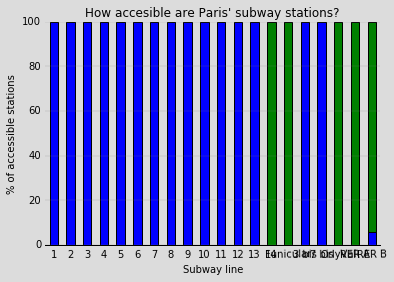

In [44]:
fig, ax = plt.subplots()

fig.set_facecolor('gainsboro')
ax.set_axis_bgcolor('gainsboro')

final_df.plot(kind='bar', x='Line', y=['% of not accessible stations per line', '% of accessible stations per line'], stacked=True, rot=1, ax=ax, legend=False)

ax.yaxis.grid(which='major', color='grey', linestyle='-', linewidth=0.2)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tick_params(
    which='major',
    top='off', 
    left='off',
    right='off',
    bottom='off',
    labelright='off', 
    labeltop='off',
    labelbottom='on')

ax.set_title("How accesible are Paris' subway stations?")
ax.set_xlabel("Subway line")
ax.set_ylabel("% of accessible stations")

plt.savefig("paris-accessible-stations.pdf")